In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("short_term_rates.csv")

In [3]:
df1 = df.iloc[:, [0, 4]]
df1

,Series Description,"Market yield on U.S. Treasury securities at 1-year constant maturity, quoted on investment basis"
0,Unit:,Percent:_Per_Year
1,Multiplier:,1
2,Currency:,NaN
3,Unique Identifier:,H15/H15/RIFLGFCY01_N.B
4,Time Period,RIFLGFCY01_N.B
...,...,...
16459,2025-01-27,4.13
16460,2025-01-28,4.14
16461,2025-01-29,4.17
16462,2025-01-30,4.16


In [4]:
df1 = df1.iloc[5:, :]
df1

,Series Description,"Market yield on U.S. Treasury securities at 1-year constant maturity, quoted on investment basis"
5,1962-01-02,3.22
6,1962-01-03,3.24
7,1962-01-04,3.24
8,1962-01-05,3.26
9,1962-01-08,3.31
...,...,...
16459,2025-01-27,4.13
16460,2025-01-28,4.14
16461,2025-01-29,4.17
16462,2025-01-30,4.16


In [5]:
df1["Series Description"] = pd.to_datetime(df1["Series Description"])
df1.iloc[:, 1] = pd.to_numeric(df1.iloc[:, 1], errors="coerce")
df1 = df1.dropna()

<ipython-input-5-b07baf66e531>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Series Description"] = pd.to_datetime(df1["Series Description"])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [6]:
df1.iloc[:, 1] = df1.iloc[:, 1].astype('float64')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [88]:
import random
random.seed(90)
size = 500
start = random.randint(9000, 15756 - size)
end = start + size
x = df1.iloc[:, 0].values
y = df1.iloc[:, 1].values

x = x[start: end]
y = y[start:end]

In [89]:
def time_diff(x1, x2):
    diff = x2 - x1
    diff = diff / np.timedelta64(1, 'D')
    return diff

In [90]:
total_days_diff = time_diff(x[0], x[len(x) - 1])

In [91]:
dt = 1 / total_days_diff

In [92]:
deltaT = (np.diff(x) / np.timedelta64(1, 'D')) * dt

In [93]:
deltaR = np.diff(y)

In [94]:
# exclude last value to ensure everything is the same size
R = y[: -1]

In [95]:
def dW(s, dT):  
    return np.random.normal(0, 1, s)

In [96]:
dW1 = dW(size - 1, dT) * np.sqrt(deltaT)

In [97]:
Rdt = -1 * R*deltaT

In [98]:
deltaT.shape

(499,)

In [99]:
Rdt.shape

(499,)

In [100]:
dW1.shape

(499,)

In [101]:
A = np.column_stack([deltaT, Rdt, dW1])
AT = A.T

AT_A = AT @ A
AT_A = AT_A.astype(float)
AT_A

array([[ 0.00275857, -0.01086659,  0.00228732],
       [-0.01086659,  0.04506013, -0.00848453],
       [ 0.00228732, -0.00848453,  0.9880162 ]])

In [102]:
inverse_AT_A = np.linalg.inv(AT_A)
p = (inverse_AT_A @ AT)
parameters = p @ deltaR
parameters

array([9.59868741, 1.20861619, 0.03286856])

(array([12692., 12784., 12874., 12965., 13057., 13149., 13239., 13330.,
        13422.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

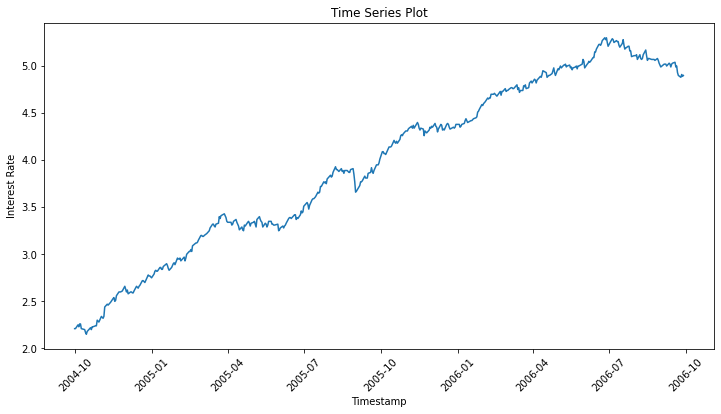

In [103]:
plt.figure(figsize=(12, 6))
plt.plot(x, y, label="Time Series Data")
plt.xlabel("Timestamp")
plt.ylabel("Interest Rate")
plt.title("Time Series Plot")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

In [104]:
def V_Model(sigma=0.1, a=0.1, b=0.041, R_initial=0.04, dt=0.001, total_time=1):
    R = [R_initial]
    W = [0]
    t_inc = int(total_time / dt)
    T = [dt*i for i in range(t_inc)]

    for i in range(t_inc - 1):
        dW = np.random.normal()*np.sqrt(dt)
        W.append(W[i] + dW)
        dR = a * (b - R[i])*dt + sigma*dW
        R.append(R[i] + dR)
        
    return R, W, T

In [105]:
R[0]

2.21

In [106]:
[c, a, s] = parameters
b = c / a

In [117]:
R1, _, T = V_Model(sigma=s*10, a=a, b=b, R_initial=R[0], dt=dt, total_time=1)

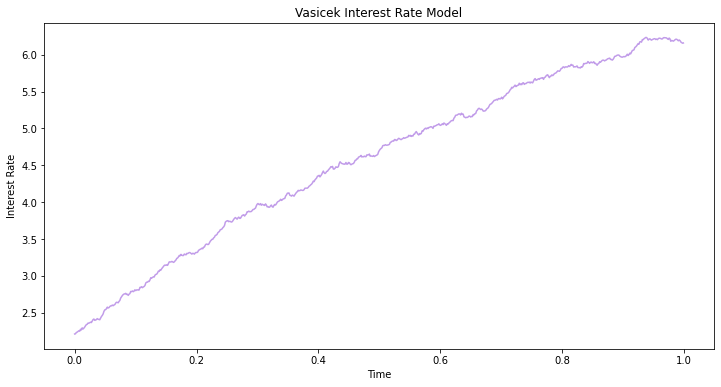

In [118]:
plt.figure(figsize=(12, 6))
plt.plot(T, R1, color='#c19ce9')
plt.xlabel("Time")
plt.ylabel("Interest Rate")
plt.title(label="Vasicek Interest Rate Model")
plt.show()

In [121]:
# Attempts to normalize actual graph
timestamps = x.astype('int64')

# Min-max normalization
min_ts, max_ts = timestamps.min(), timestamps.max()
normalized = (timestamps - min_ts) / (max_ts - min_ts)

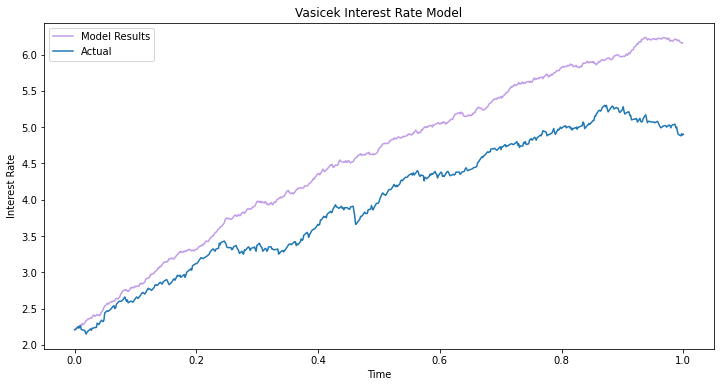

In [122]:
plt.figure(figsize=(12, 6))
plt.plot(T, R1, label="Model Results", color='#c19ce9')
plt.plot(normalized, y, label="Actual")
plt.xlabel("Time")
plt.ylabel("Interest Rate")
plt.title(label="Vasicek Interest Rate Model")
plt.legend()
plt.show()

## Results

I believe the regression was relatively successful. However something interesting is happening when comparing the model and the actual graph. The regression for sigma seems off in the sense that the actual graph displays more volitility than the one predicted by the model. Originally, the graph seemed quite smooth for an interest rate curve. After increasing the volitility of the model by an order of magnitude, it has given a result the somewhat resembles our original interest rate graph. Thus, I believe there needs to be a correctional factor for the parameter sigma. 

Additionally, the regression believes that the actual parameter for "long-term mean" or the b-term is much higher than displayed. All of this is visible in the graph above

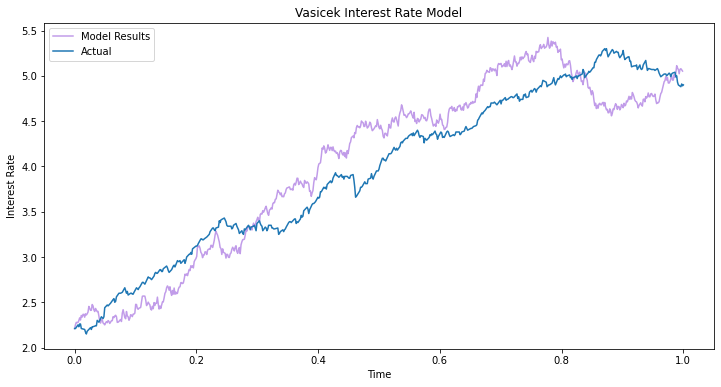

In [127]:
## Correctional Factors: increase sigma by another factor of 3, decrease b by a 25%
R1, _, T = V_Model(sigma=s*30, a=a, b=b*0.75, R_initial=R[0], dt=dt, total_time=1)
plt.figure(figsize=(12, 6))
plt.plot(T, R1, label="Model Results", color='#c19ce9')
plt.plot(normalized, y, label="Actual")
plt.xlabel("Time")
plt.ylabel("Interest Rate")
plt.title(label="Vasicek Interest Rate Model")
plt.legend()
plt.show()